# **Movie Recommendation System**

# Building a Movie Recommendation System with Advanced Techniques Using Natural Language Processing


In [ ]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
movie = pd.read_csv("/content/tmdb_5000_movies.csv",error_bad_lines=False, encoding = 'utf-8')
credits = pd.read_csv("/content/tmdb_5000_credits.csv",error_bad_lines=False,encoding = 'utf-8')

In [34]:
movie.shape

(4803, 20)

In [35]:
credits.shape

(938, 4)

In [36]:
movie.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [37]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [38]:
movies = movie.merge(credits, on ='title')

In [39]:
movies = movies[["movie_id","title","genres","keywords","overview","cast","crew"]]

In [40]:
movies.isnull().sum()

movie_id    0
title       0
genres      0
keywords    0
overview    0
cast        0
crew        1
dtype: int64

In [41]:
movies.dropna(inplace = True)

In [42]:
movies.duplicated().sum()

0

In [43]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [44]:

import ast


In [45]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i["name"])
    return L

In [46]:
movies["genres"] = movies["genres"].apply(convert)

In [47]:
movies.iloc[0].genres

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [48]:
movies["cast"]

0      [{"cast_id": 242, "character": "Jake Sully", "...
1      [{"cast_id": 4, "character": "Captain Jack Spa...
2      [{"cast_id": 1, "character": "James Bond", "cr...
3      [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4      [{"cast_id": 5, "character": "John Carter", "c...
                             ...                        
932    [{"cast_id": 23, "character": "Evey Hammond", ...
933    [{"cast_id": 1, "character": "Chon Wang", "cre...
934    [{"cast_id": 17, "character": "Ted - Man with ...
935    [{"cast_id": 1, "character": "Maggie Peyton", ...
936    [{"cast_id": 13, "character": "Nathan R. Conra...
Name: cast, Length: 937, dtype: object

In [49]:

def Act_count(text):
    L = []
    actor_count = 0
    for i in ast.literal_eval(text):
        if actor_count<3:
            L.append(i["name"])
            actor_count += 1
    return L


In [50]:
movies["cast"] = movies["cast"].apply(Act_count)

In [51]:
movies.iloc[0].cast

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver']

In [52]:
movies.head(2)

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [53]:
def fetch_director(text):
    l = []
    for i in ast.literal_eval(text):
        if i["job"] =="Director":
            l.append(i["name"])
    return l

In [54]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [55]:

def nospace(text):
    l = []
    for i in text:
        l.append(i.replace(" ", ""))
    return l

In [56]:
movies['genres'] = movies['genres'].apply(nospace)
movies['keywords'] = movies['keywords'].apply(nospace)
movies['cast'] = movies['cast'].apply(nospace)
movies['crew'] = movies['crew'].apply(nospace)

In [57]:
movies['overview'] = movies['overview'].apply(lambda x: x.split())

In [58]:
movies.head(2)

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[[, {, "", i, d, "", :, , 1, 4, 6, 3, ,, , "", n,...","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[[, {, "", i, d, "", :, , 2, 7, 0, ,, , "", n, a,...","[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]


In [59]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] +   movies['crew']

In [60]:
df = movies.drop(columns = ['overview','genres', 'keywords','cast','crew'])

In [61]:
df.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [62]:
df["tags"][-1:]

936    [When, the, daughter, of, a, psychiatrist, is,...
Name: tags, dtype: object

In [63]:
df["tags"] = df["tags"].apply(lambda x: " ".join(x))

In [64]:
df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


# Machine Learning Approach

#BOW/Count Vectorizer

In [65]:
# Application of Models-
#ML-Bag of Words

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [67]:
vector = cv.fit_transform(df["tags"]).toarray()

In [149]:
vector.shape


(937, 10430)

In [153]:
vector[0:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [69]:
from sklearn.metrics.pairwise import cosine_similarity

In [70]:
similarity_score = cosine_similarity(vector)

In [71]:
df.head(5)

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [151]:
similarity_score

array([[1.        , 0.34340141, 0.26261287, ..., 0.30194054, 0.26726124,
        0.19658927],
       [0.34340141, 1.        , 0.34269019, ..., 0.23329532, 0.29368924,
        0.30379065],
       [0.26261287, 0.34269019, 1.        , ..., 0.32708557, 0.33338464,
        0.27104108],
       ...,
       [0.30194054, 0.23329532, 0.32708557, ..., 1.        , 0.49931271,
        0.26711223],
       [0.26726124, 0.29368924, 0.33338464, ..., 0.49931271, 1.        ,
        0.25613588],
       [0.19658927, 0.30379065, 0.27104108, ..., 0.26711223, 0.25613588,
        1.        ]])

In [73]:
df[df["title"]=="Spectre"].index[0]

2

In [74]:
df.iloc[0].title

'Avatar'

In [75]:
for i in df.title[:4]:
    index = df[df["title"] == i].index[0]
    distance = sorted(list(enumerate(similarity_score[index])),reverse = True, key = lambda x: x[1])[:6]
    print(distance)


[(0, 1.0), (420, 0.43580699008925894), (7, 0.4261394844018666), (187, 0.42068766855960316), (153, 0.4086514987502554), (311, 0.39870024026782175)]
[(1, 1.0), (274, 0.5233562923912636), (137, 0.514959446034723), (7, 0.5098188765330927), (106, 0.4890306160111312), (29, 0.4866352778555171)]
[(2, 0.9999999999999999), (856, 0.46728090129813477), (432, 0.4672809012981347), (786, 0.46256884688429795), (97, 0.45999863704309457), (160, 0.4599554426548081)]
[(3, 0.9999999999999999), (65, 0.5959547165907595), (160, 0.559368162359778), (119, 0.5431439421372035), (847, 0.5403663960645979), (478, 0.536210189684388)]


In [76]:
distance

[(3, 0.9999999999999999),
 (65, 0.5959547165907595),
 (160, 0.559368162359778),
 (119, 0.5431439421372035),
 (847, 0.5403663960645979),
 (478, 0.536210189684388)]

In [77]:
l = []
for i in distance:
    Name = df.iloc[i[0]].title
    l.append(Name)
print(l)

['The Dark Knight Rises', 'The Dark Knight', 'How to Train Your Dragon 2', 'Batman Begins', 'Semi-Pro', 'Daylight']


In [78]:
def recommend(movie):
    index = df[df["title"] == movie].index[0]
    distances = sorted(list(enumerate(similarity_score[index])), reverse = True, key = lambda x: x[1])

    for i in distances[1:6]:
        print(df.iloc[i[0]].title)

In [79]:
recommend('The Dark Knight Rises')

The Dark Knight
How to Train Your Dragon 2
Batman Begins
Semi-Pro
Daylight


# The Model is working absolutely fine.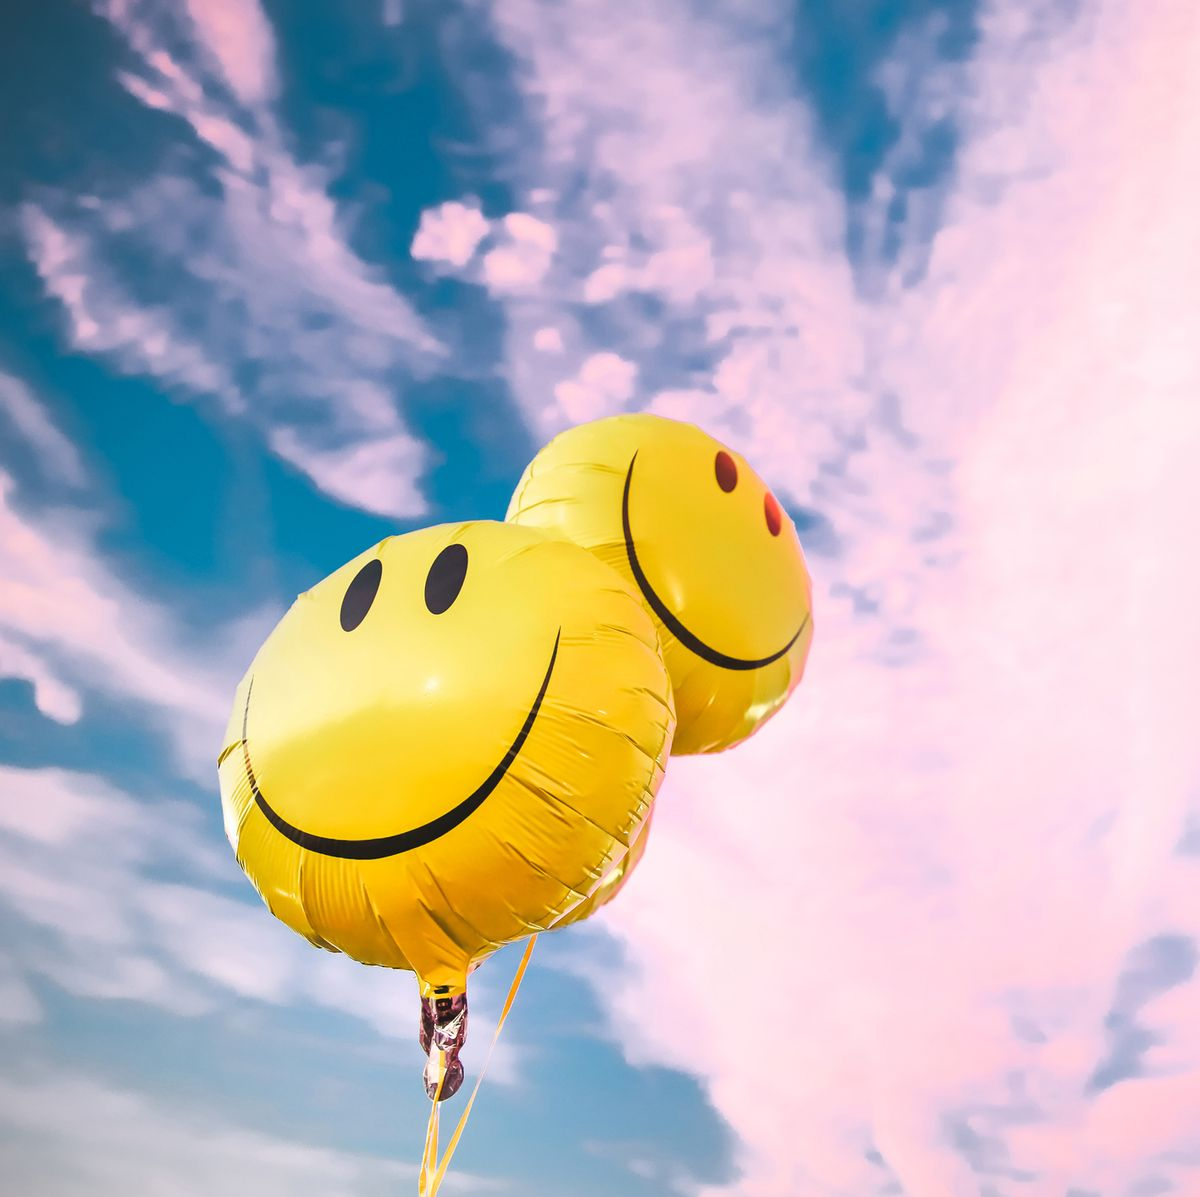

# Deeep Learning Approach

1.   Bert
2.   Word2Vec



In [80]:
###Bert

# The Dreaded Bert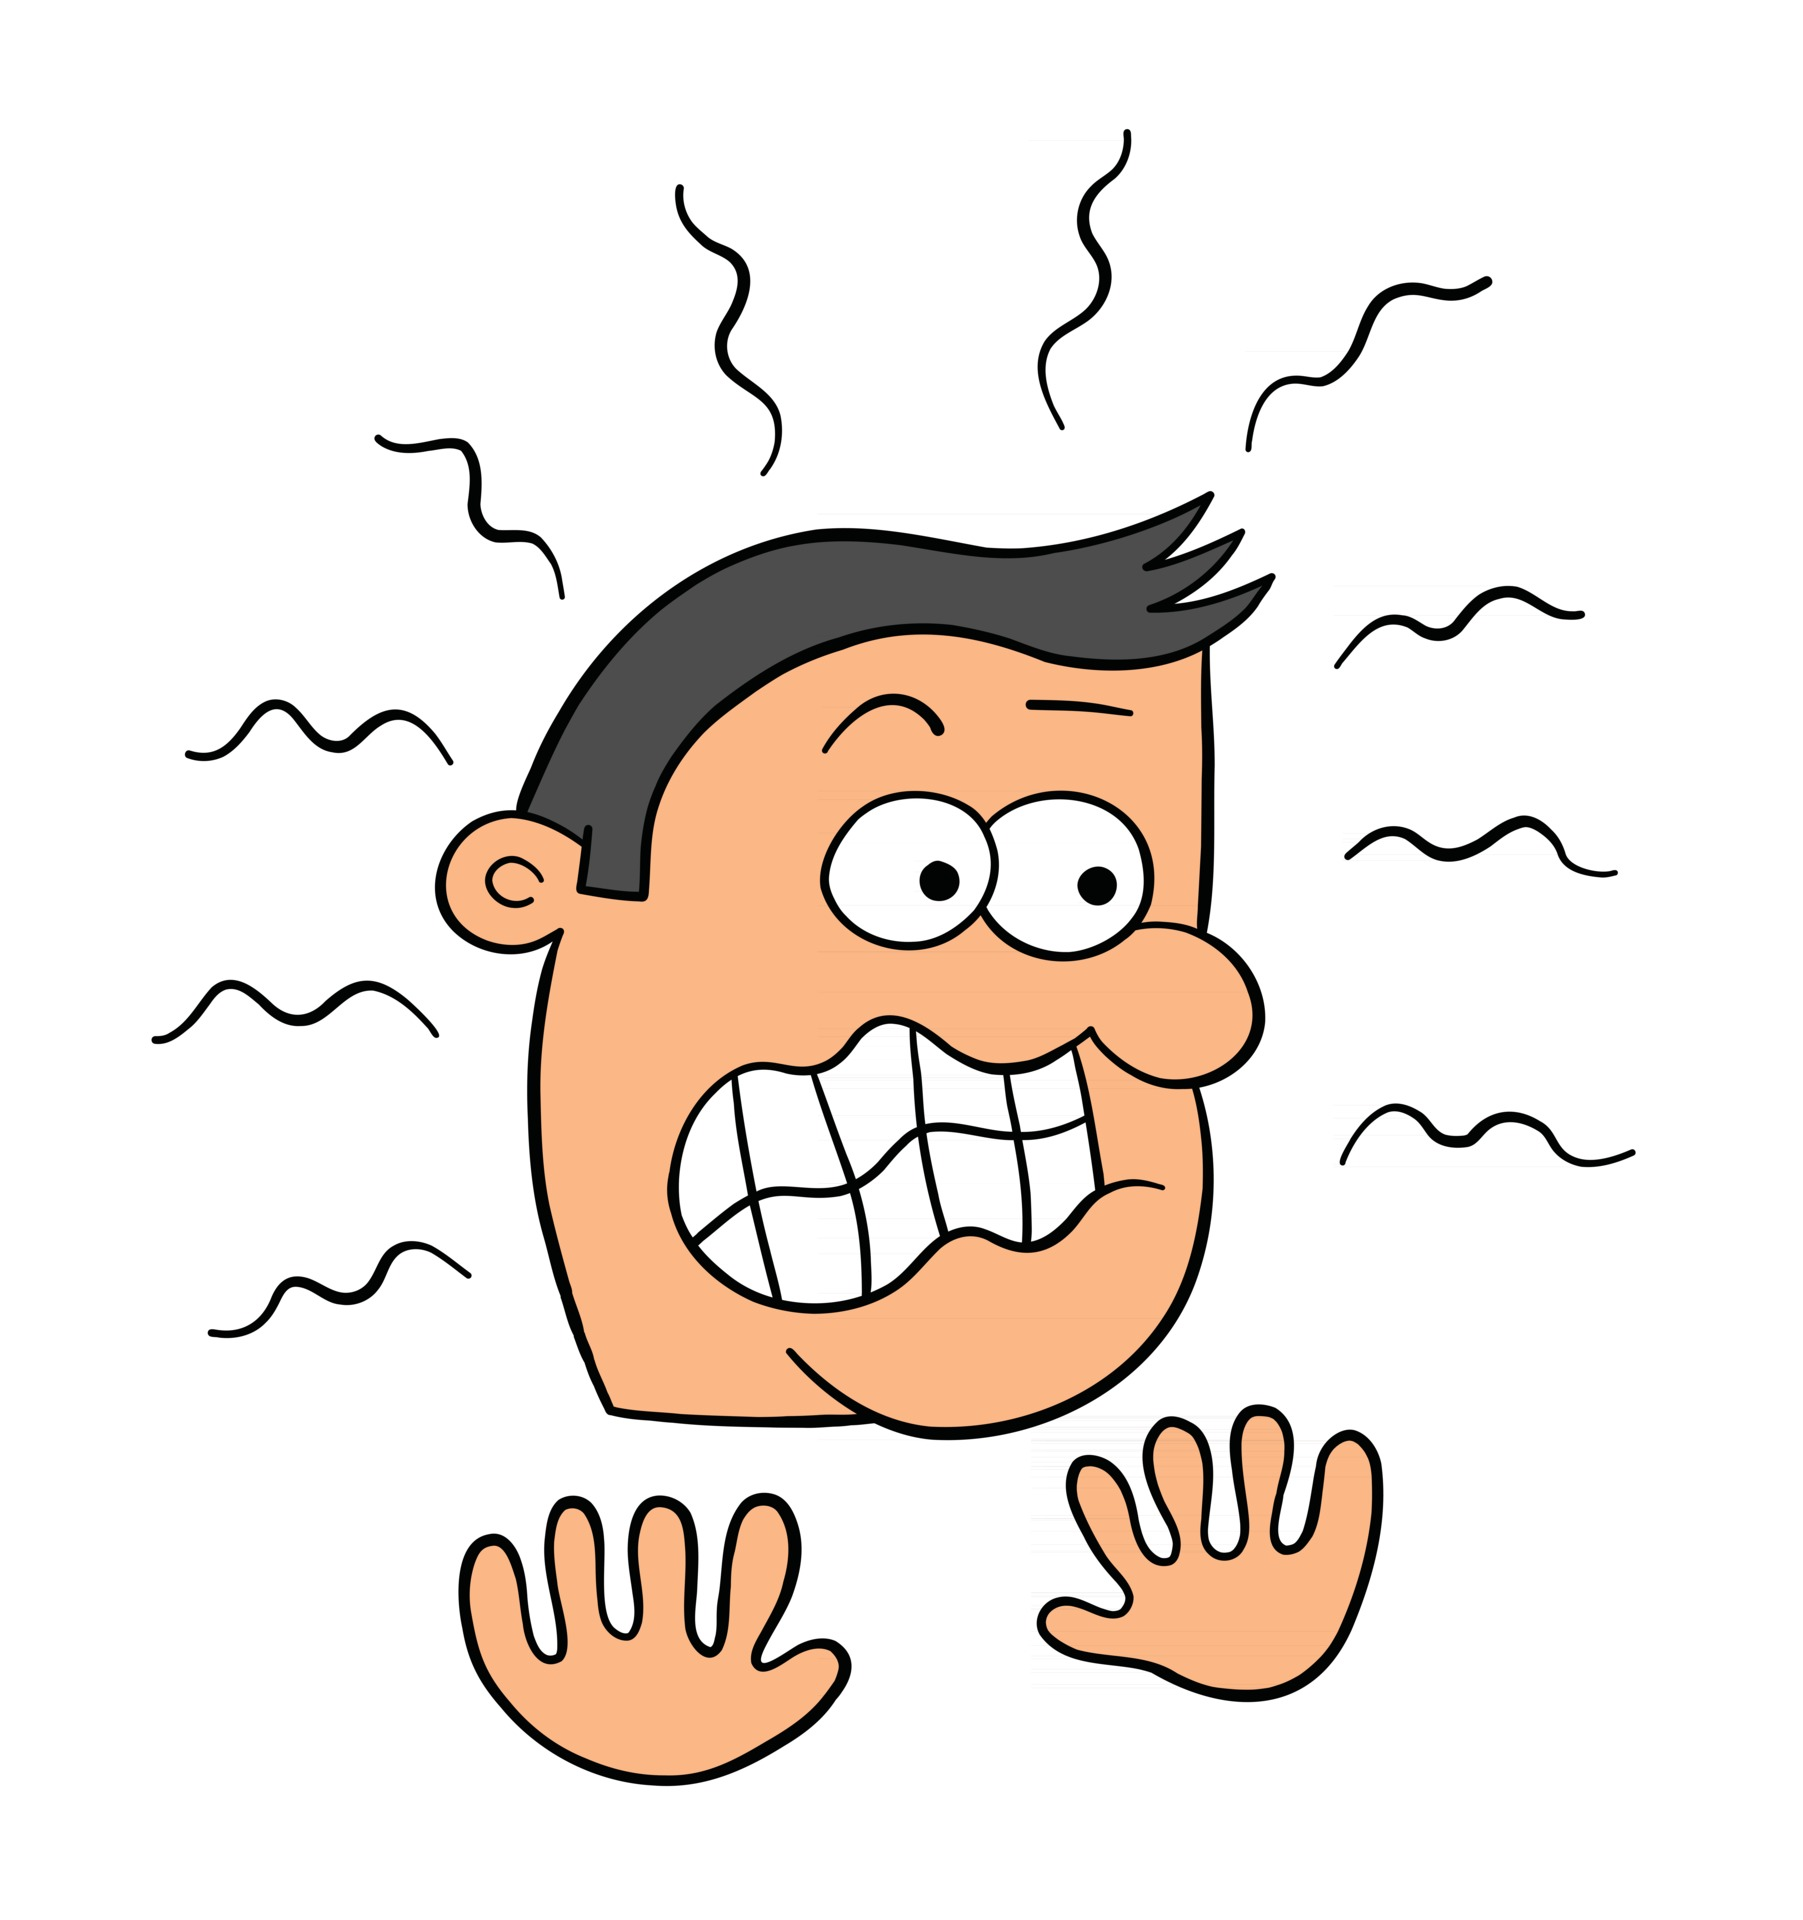

In [81]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [82]:
def stop_words(text):
    token = word_tokenize(text)
    L=[]
    for word in token:
        if word not in stopwords.words('english'):
            L.append(word)
    return " ".join(L)


In [83]:
df["tags"] = df["tags"].str.lower()

In [84]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [85]:
df["tags"].apply(stop_words)

0      22nd century , paraplegic marine dispatched mo...
1      captain barbossa , long believed dead , come b...
2      cryptic message bond ’ past sends trail uncove...
3      following death district attorney harvey dent ...
4      john carter war-weary , former military captai...
                             ...                        
932    world great britain become fascist state , mas...
933    dynamic duo chon wang roy o'bannon return anot...
934    man yellow hat befriends curious george jungle...
935    maggie peyton , new owner number 53 - free-whe...
936    daughter psychiatrist kidnapped , 's horrified...
Name: tags, Length: 937, dtype: object

In [86]:
#Lemmatization

In [87]:
from nltk.stem import WordNetLemmatizer
lemmatizer =  WordNetLemmatizer()
def lemma(text):
    tokens = word_tokenize(text)
    sent = [lemmatizer.lemmatize(token) for token in tokens]
    sent = " ".join(sent)
    return sent

In [88]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [89]:
df["tags"]= df["tags"].apply(lemma)

In [90]:
df['tags'].head()[0]

'in the 22nd century , a paraplegic marine is dispatched to the moon pandora on a unique mission , but becomes torn between following order and protecting an alien civilization . action adventure fantasy sciencefiction [ { `` i d `` : 1 4 6 3 , `` n a m e `` : `` c u l t u r e c l a s h `` } , { `` i d `` : 2 9 6 4 , `` n a m e `` : `` f u t u r e `` } , { `` i d `` : 3 3 8 6 , `` n a m e `` : `` s p a c e w a r `` } , { `` i d `` : 3 3 8 8 , `` n a m e `` : `` s p a c e c o l o n y `` } , { `` i d `` : 3 6 7 9 , `` n a m e `` : `` s o c i e t y `` } , { `` i d `` : 3 8 0 1 , `` n a m e `` : `` s p a c e t r a v e l `` } , { `` i d `` : 9 6 8 5 , `` n a m e `` : `` f u t u r i s t i c `` } , { `` i d `` : 9 8 4 0 , `` n a m e `` : `` r o m a n c e `` } , { `` i d `` : 9 8 8 2 , `` n a m e `` : `` s p a c e `` } , { `` i d `` : 9 9 5 1 , `` n a m e `` : `` a l i e n `` } , { `` i d `` : 1 0 1 4 8 , `` n a m e `` : `` t r i b e `` } , { `` i d `` : 1 0 1 5 8 , `` n a m e `` : `` a l i e 

In [91]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=40145621ea7289ee076555b951689e83094313c5ae72c73ea7e556b92f742b79
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [92]:
from sentence_transformers import SentenceTransformer,util
model = SentenceTransformer("multi-qa-mpnet-base-dot-v1")
query_embedding = model.encode('This framework generates embeddings for each input sentence')
passage_embedding = model.encode(['Sentences are passed as a list of string.',
                                  'Kush is a handsome and a very nice gentle man.'])
print("Similarity:", util.dot_score(query_embedding,passage_embedding))


Similarity: tensor([[20.2179,  6.8121]])


In [93]:
tags = df["tags"].to_list()

In [94]:
model = SentenceTransformer('multi-qa-mpnet-base-dot-v1')
passege_embedding = model.encode(df['tags'].to_list())

In [95]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(passege_embedding)

In [96]:
closest = cosine_similarity(model.encode(df['title'].to_list()))

In [97]:
df['title'].str.split(' ')

0                                              [Avatar]
1      [Pirates, of, the, Caribbean:, At, World's, End]
2                                             [Spectre]
3                            [The, Dark, Knight, Rises]
4                                        [John, Carter]
                             ...                       
932                                  [V, for, Vendetta]
933                                 [Shanghai, Knights]
934                                   [Curious, George]
935                             [Herbie, Fully, Loaded]
936                               [Don't, Say, a, Word]
Name: title, Length: 937, dtype: object

In [98]:
df['title'] = df['title'].str.lower()

In [99]:
def closest(text):
    title = df["title"].str.split()
    i =0
    for val in title:
        if text in val:
            print(df['title'][i])
            return i
        i+=1

In [100]:
def recommend_bert(movie):
    movie = movie.lower()
    titles = df['title']
    if movie in titles.to_list():
        index = df[df['title']==movie].index[0]
    else:
        index = closest(movie)
    distances = sorted(list(enumerate(similarity[index])), reverse = True, key = lambda x: x[1])

    for i in distances[1:10]:
        print(df.iloc[i[0]].title)

In [101]:
recommend_bert('Harry')

harry potter and the half-blood prince
harry potter and the goblet of fire
harry potter and the prisoner of azkaban
harry potter and the philosopher's stone
harry potter and the chamber of secrets
harry potter and the order of the phoenix
inkheart
dark shadows
cinderella
knowing


# Finally!!! After Significant Effort
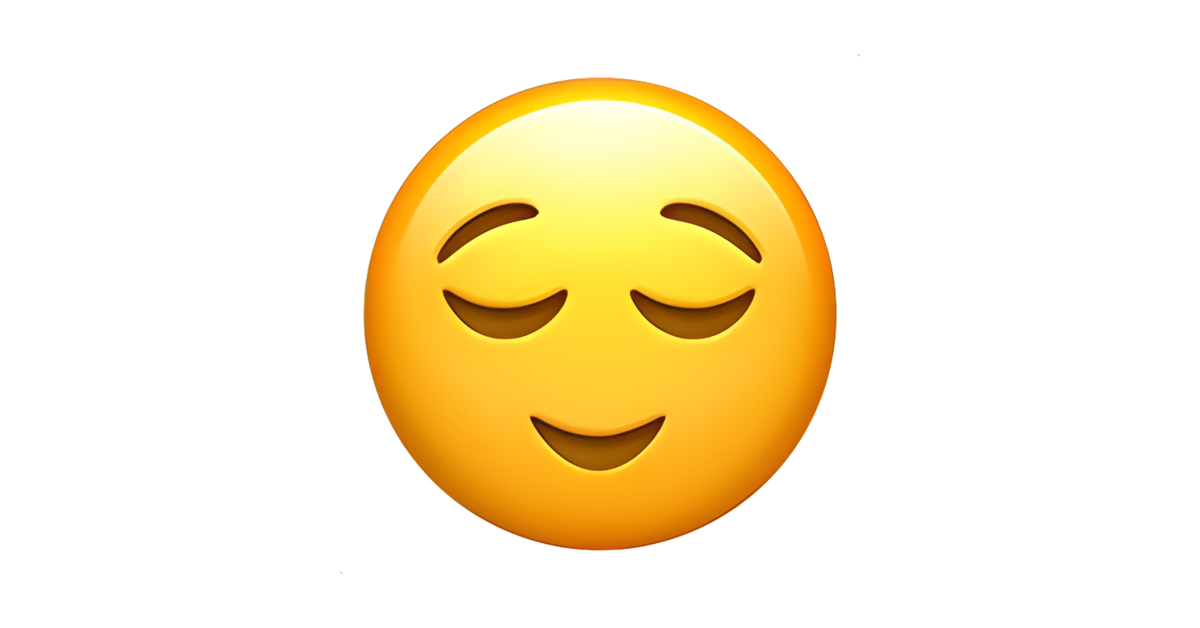

In [102]:
#Word 2 Vec

In [103]:
import gensim
from gensim.models import Word2Vec,KeyedVectors

In [104]:
model = gensim.models.Word2Vec(window =10, min_count=1)

In [105]:
sentences = [word_tokenize(text) for text in df['tags']]


In [154]:
sentences[4]

['john',
 'carter',
 'is',
 'a',
 'war-weary',
 ',',
 'former',
 'military',
 'captain',
 'who',
 "'s",
 'inexplicably',
 'transported',
 'to',
 'the',
 'mysterious',
 'and',
 'exotic',
 'planet',
 'of',
 'barsoom',
 '(',
 'mar',
 ')',
 'and',
 'reluctantly',
 'becomes',
 'embroiled',
 'in',
 'an',
 'epic',
 'conflict',
 '.',
 'it',
 "'s",
 'a',
 'world',
 'on',
 'the',
 'brink',
 'of',
 'collapse',
 ',',
 'and',
 'carter',
 'rediscovers',
 'his',
 'humanity',
 'when',
 'he',
 'realizes',
 'the',
 'survival',
 'of',
 'barsoom',
 'and',
 'it',
 'people',
 'rest',
 'in',
 'his',
 'hand',
 '.',
 'action',
 'adventure',
 'sciencefiction',
 '[',
 '{',
 '``',
 'i',
 'd',
 '``',
 ':',
 '8',
 '1',
 '8',
 ',',
 '``',
 'n',
 'a',
 'm',
 'e',
 '``',
 ':',
 '``',
 'b',
 'a',
 's',
 'e',
 'd',
 'o',
 'n',
 'n',
 'o',
 'v',
 'e',
 'l',
 '``',
 '}',
 ',',
 '{',
 '``',
 'i',
 'd',
 '``',
 ':',
 '8',
 '3',
 '9',
 ',',
 '``',
 'n',
 'a',
 'm',
 'e',
 '``',
 ':',
 '``',
 'm',
 'a',
 'r',
 's',
 '``',
 '}

In [106]:
model.build_vocab(sentences)

In [107]:
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)

(631011, 1801465)

In [124]:
def recommend_movies_wv(movie_name):
  movie_vector = model.wv[movie_name]
  similar_movies = model.wv.most_similar(movie_vector, topn=5)
  return similar_movies

In [ ]:
def recommend(movie):
    index = df[df["title"] == movie].index[0]
    distances = sorted(list(enumerate(similarity_score[index])), reverse = True, key = lambda x: x[1])

In [147]:
model.wv.most_similar[index]

TypeError: ignored

In [137]:
df["title"].avatar

AttributeError: ignored

In [125]:
similar_movies = recommend_movies_wv("Avatar")

KeyError: ignored

In [135]:
import gensim

def recommend(movie_title):

    # Create a word2vec model
    model = gensim.models.Word2Vec(df["tags"], min_count=1)

    # Get the vector for the movie
    movie_vector = model.wv[movie_title]

    # Find the most similar movies to the movie
    similar_movies = model.wv.most_similar(movie_vector, topn=5)

    # Print the titles of the most similar movies
    for movie in similar_movies:
        print(movie[0])

# Test the function
recommend("avatar")

KeyError: ignored

In [133]:
df['title']

0                                        avatar
1      pirates of the caribbean: at world's end
2                                       spectre
3                         the dark knight rises
4                                   john carter
                         ...                   
932                              v for vendetta
933                            shanghai knights
934                              curious george
935                         herbie fully loaded
936                            don't say a word
Name: title, Length: 937, dtype: object